In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# LaTeX style plots
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
    }
plt.rcParams.update(tex_fonts)

In [16]:
# read in dataset and make datetime format on index column
df = pd.read_csv('../air_weather_data/pollution_and_weather.csv')
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d %H:%M')
df = df.set_index('Date')

In [17]:
np.sum(df.iloc[:,:] <0) # values below zero
df.isna().sum()
df

,"Torkel Knutssongatan, NO$_2$","Torkel Knutssongatan, PM$_{10}$","Torkel Knutssongatan, PM$_{2.5}$","Hornsgatan, PM$_{10}$","Hornsgatan, PM$_{2.5}$","Norr malma, PM$_{10}$","Norr malma, PM$_{2.5}$",Temperature,Atmospheric pressure,Relative humidity,Precipitation,Solar radiation,Wind speed,sine day,cosine day,sine week,cosine week,sine year,cosine year
Date,,,,,,,,,,,,,,,,,,,
2015-01-01 01:00:00,4.50,28.40,22.90,32.50,15.10,7.70,3.80,2.74550,1009.35,99.8999,0.0,0.00050,3.97500,2.588190e-01,0.965926,0.037391,0.999301,0.002222,0.999998
2015-01-01 02:00:00,3.10,8.50,5.50,11.00,6.40,6.60,3.30,3.27575,1008.85,99.9500,0.0,0.00050,5.29300,5.000000e-01,0.866025,0.074730,0.997204,0.002939,0.999996
2015-01-01 03:00:00,2.10,8.70,3.60,13.80,6.20,8.00,2.80,3.03900,1008.45,99.9750,0.0,0.00050,6.59100,7.071068e-01,0.707107,0.111964,0.993712,0.003656,0.999993
2015-01-01 04:00:00,1.60,10.50,4.80,15.20,6.50,9.60,2.90,2.80825,1007.95,99.8999,0.0,0.00025,6.55499,8.660254e-01,0.500000,0.149042,0.988831,0.004372,0.999990
2015-01-01 05:00:00,1.40,12.10,5.60,15.30,6.60,10.80,2.80,2.79900,1007.50,99.8999,0.0,0.00000,5.94700,9.659258e-01,0.258819,0.185912,0.982566,0.005089,0.999987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 20:00:00,5.57,2.78,5.02,6.54,4.57,1.88,1.37,4.43800,994.50,93.6000,0.0,0.00250,3.48000,-8.660254e-01,0.500000,0.997204,-0.074730,0.003842,0.999993
2021-12-31 21:00:00,5.53,3.41,5.65,6.95,4.86,1.66,1.22,3.93375,995.00,95.1000,0.0,0.00375,4.55700,-7.071068e-01,0.707107,0.993712,-0.111964,0.004559,0.999990
2021-12-31 22:00:00,5.13,2.44,5.31,6.15,4.39,1.41,1.03,3.14275,995.75,97.9501,0.0,0.00100,3.46800,-5.000000e-01,0.866025,0.988831,-0.149042,0.005275,0.999986


# Define a plot function

In [18]:
# plot function for time series
def plot_time_series(df, row, cols, figsize, savefig=False, fig_path=None):

    fig, axes = plt.subplots(row, cols, constrained_layout = True, figsize = figsize)
    # now 12 possible labels
    annot = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)','(k)','(l)'] 
    j = 0
    for i, ax in enumerate(fig.axes):
        df.iloc[:, j].plot(ax = ax, linewidth = 1.0) # linewidth default = 1.5
        ax.set_xlabel('')
        # set y label on plots with even index 
        if j%2 == 0:
            ax.set_ylabel('$\mu$g/m$^3$')
            
        ax.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=2, borderaxespad=0.1)
        ax.annotate(annot[i], xy=(0.0, 1.09), xycoords="axes fraction")
        j += 1
    if savefig:
        plt.savefig(fig_path)

# Make time series plots of PM2.5 and PM10

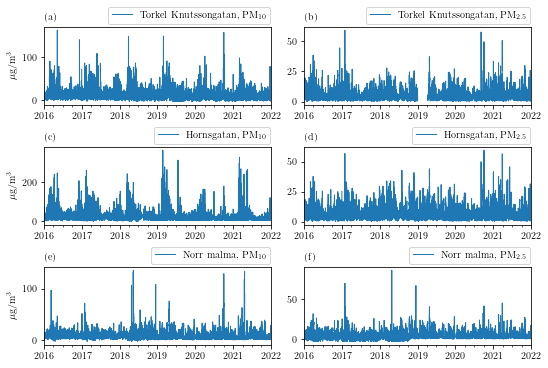

In [19]:
df_temp = df[['Torkel Knutssongatan, PM$_{10}$', 
              'Torkel Knutssongatan, PM$_{2.5}$',
              'Hornsgatan, PM$_{10}$', 
              'Hornsgatan, PM$_{2.5}$',
              'Norr malma, PM$_{10}$', 
              'Norr malma, PM$_{2.5}$',]]

df_temp = df_temp['2016-01-01 00:00:00':]
plot_time_series(df_temp, row=3, cols=2, figsize=(7.5, 5), savefig=False, fig_path='../plots/time_series_plots.pdf')

# Make correlation matrix 

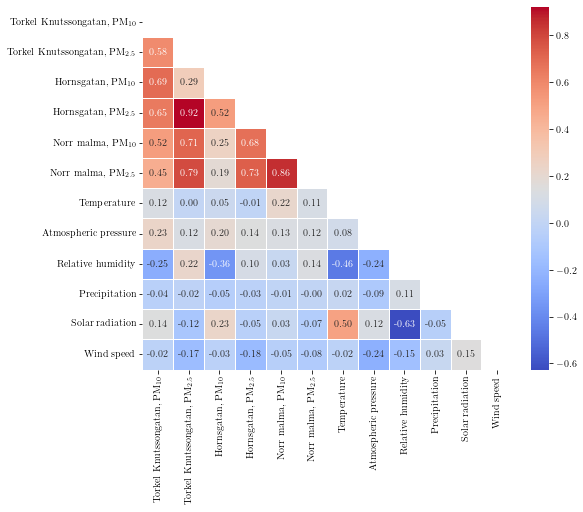

In [20]:
df_corr = df[['Torkel Knutssongatan, PM$_{10}$', 
              'Torkel Knutssongatan, PM$_{2.5}$',
              'Hornsgatan, PM$_{10}$', 
              'Hornsgatan, PM$_{2.5}$',
              'Norr malma, PM$_{10}$', 
              'Norr malma, PM$_{2.5}$',
              'Temperature',
              'Atmospheric pressure',
              'Relative humidity',
              'Precipitation',
              'Solar radiation',
              'Wind speed']]

mat = df_corr.corr()
mask = np.triu(np.ones_like(mat, dtype=bool))
fig, ax = plt.subplots(figsize = (8,7), constrained_layout = True)
ax = sns.heatmap(mat, mask=mask, annot = True, linewidths=0.5, fmt = ".2f", square=False, cmap='coolwarm')

# plt.savefig('../plots/correlation_matrix.pdf')